In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
pitching_df = pd.read_csv('./mlb-pitching-2019.csv')

In [5]:
pitching_df.head()

,Tm,#P,PAge,RA/G,W,L,W-L%,ERA,G,GS,GF,CG,tSho,cSho,SV,IP,H,R,ER,HR,BB,IBB,SO,HBP,BK,WP,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W,LOB
0,ARI,27,28.6,4.59,85,77,0.525,4.25,162,162,162,0,11.0,0.0,45,1465.0,1400,743,691,220,516,38,1427,62,4,49,6230,106,4.40,1.308,8.6,1.4,3.2,8.8,2.77,1092
1,ATL,32,27.5,4.59,97,65,0.599,4.19,162,162,161,1,8.0,0.0,44,1450.2,1421,743,675,203,548,33,1393,69,3,70,6243,110,4.39,1.357,8.8,1.3,3.4,8.6,2.54,1148
2,BAL,39,27.3,6.06,54,108,0.333,5.59,162,162,162,0,5.0,0.0,27,1443.0,1544,981,897,305,561,11,1248,80,6,75,6396,83,5.56,1.459,9.6,1.9,3.5,7.8,2.22,1086
3,BOS,28,29.0,5.11,84,78,0.519,4.70,162,162,161,1,8.0,1.0,33,1471.0,1423,828,768,215,605,22,1633,76,6,81,6400,103,4.28,1.379,8.7,1.3,3.7,10.0,2.70,1159
4,CHC,33,31.1,4.43,84,78,0.519,4.10,162,162,161,1,10.0,1.0,38,1442.0,1376,717,657,195,534,16,1444,80,1,60,6190,108,4.25,1.325,8.6,1.2,3.3,9.0,2.70,1147


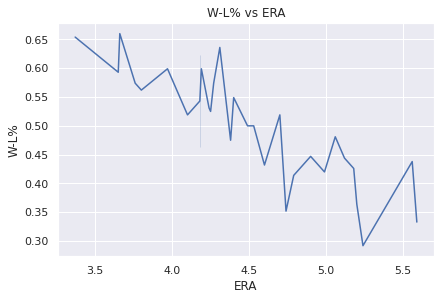

In [11]:
sns.set(style="darkgrid")

plt.title('W-L% vs ERA')
sns.lineplot(x='ERA', y='W-L%', data=pitching_df)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text major ticklabel objects>)

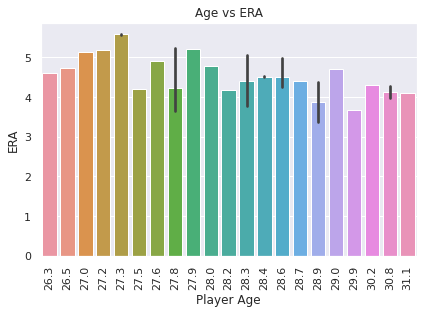

In [21]:
sns.set(style="darkgrid")

plt.title('Age vs ERA')
sns.barplot(x='PAge', y='ERA', data=pitching_df, estimator=np.mean)
plt.xlabel("Player Age")
plt.xticks(rotation=90)

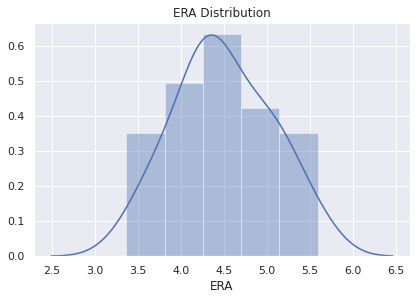

In [24]:
#Distribution Plots
plt.title('ERA Distribution')
sns.distplot(pitching_df.ERA)

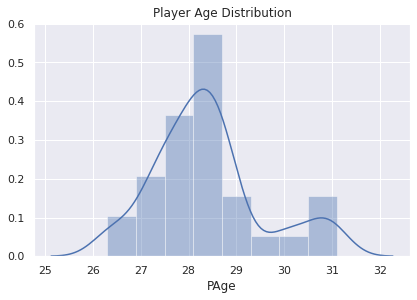

In [26]:
plt.title('Player Age Distribution')
sns.distplot(pitching_df.PAge)

In [46]:
pitching_df.head(3)

,Tm,#P,PAge,RA/G,W,L,W-L%,ERA,G,GS,GF,CG,tSho,cSho,SV,IP,H,R,ER,HR,BB,IBB,SO,HBP,BK,WP,BF,ERA+,FIP,WHIP,H9,HR9,BB9,SO9,SO/W,LOB
0,ARI,27,28.6,4.59,85,77,0.525,4.25,162,162,162,0,11.0,0.0,45,1465.0,1400,743,691,220,516,38,1427,62,4,49,6230,106,4.40,1.308,8.6,1.4,3.2,8.8,2.77,1092
1,ATL,32,27.5,4.59,97,65,0.599,4.19,162,162,161,1,8.0,0.0,44,1450.2,1421,743,675,203,548,33,1393,69,3,70,6243,110,4.39,1.357,8.8,1.3,3.4,8.6,2.54,1148
2,BAL,39,27.3,6.06,54,108,0.333,5.59,162,162,162,0,5.0,0.0,27,1443.0,1544,981,897,305,561,11,1248,80,6,75,6396,83,5.56,1.459,9.6,1.9,3.5,7.8,2.22,1086


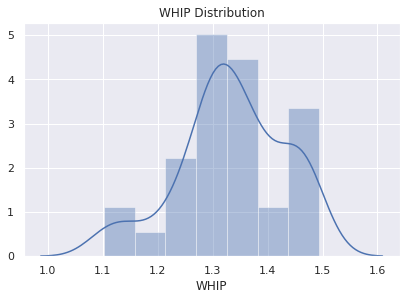

In [33]:
plt.title('WHIP Distribution')
sns.distplot(pitching_df.WHIP)

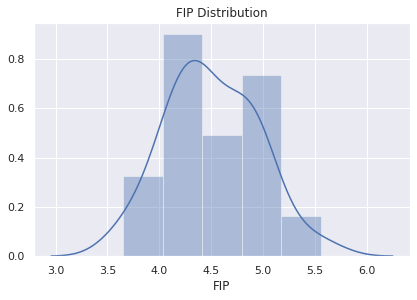

In [35]:
plt.title('FIP Distribution')
sns.distplot(pitching_df.FIP)

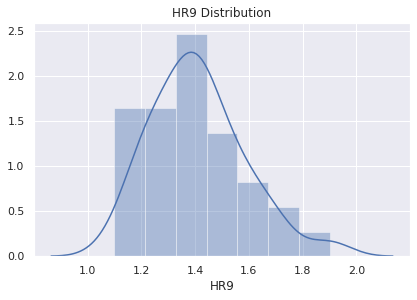

In [36]:
plt.title('HR9 Distribution')
sns.distplot(pitching_df.HR9)

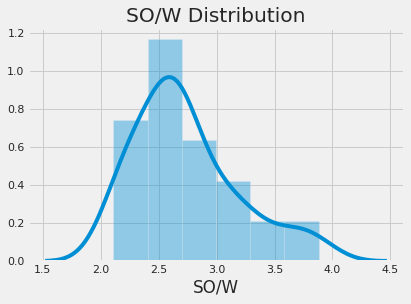

In [131]:
plt.title('SO/W Distribution')
sns.distplot(pitching_df['SO/W'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 31 Text major ticklabel objects>)

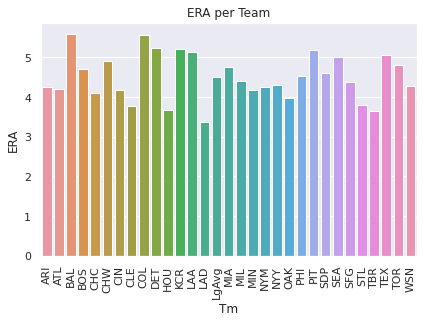

In [48]:
team_era = pitching_df.pivot_table(values="ERA", index="Tm")

sns.set(style="darkgrid")

plt.title('ERA per Team')
sns.barplot(x=team_era.index, y='ERA', data=team_era)
plt.xticks(rotation=90)

# Linear Regression Model to Predict ERA based on WHIP

In [75]:
from sklearn.linear_model import LinearRegression

In [76]:
X = pitching_df.WHIP
y = pitching_df.ERA

In [82]:
X = np.asarray(X).reshape(-1,1)
y = np.asarray(y).reshape(-1,1)

In [100]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [101]:
reg = LinearRegression().fit(X_train, y_train)

In [103]:
reg.score(X_test, y_test)

0.8960123029603009

In [107]:
y_pred = reg.predict(X_test)

In [108]:
y_test

array([[4.38],
       [4.27],
       [4.49],
       [5.06],
       [4.99],
       [5.2 ],
       [5.12],
       [3.37]])

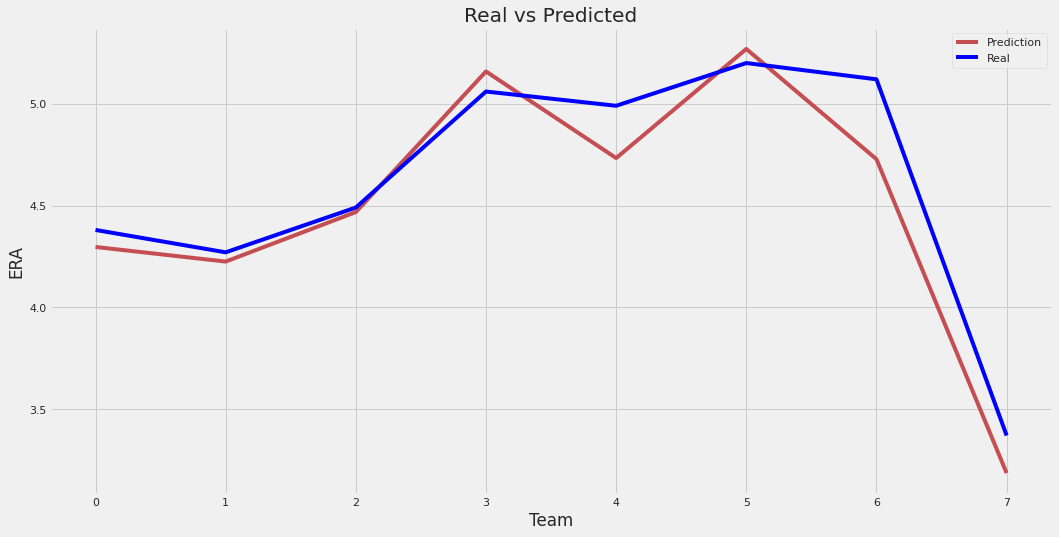

In [115]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(16,8))
plt.title("Real vs Predicted")
plt.plot(y_pred, color='r')
plt.plot(y_test, color='blue')
plt.ylabel("ERA")
plt.xlabel("Team")
plt.legend(["Prediction", "Real"])

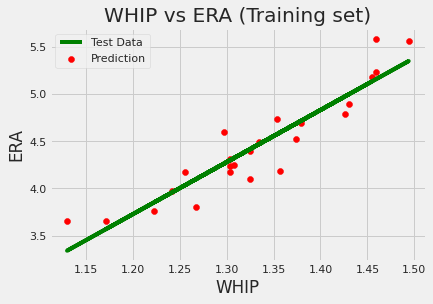

In [148]:
plt.scatter(X_train, y_train, color = "red")
plt.plot(X_train, reg.predict(X_train), color = "green")
plt.title("WHIP vs ERA (Training set)")
plt.xlabel("WHIP")
plt.ylabel("ERA")
plt.legend(['Test Data', 'Prediction'])
plt.show()

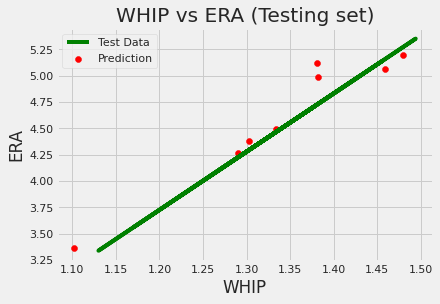

In [147]:
plt.scatter(X_test, y_test, color = "red")
plt.plot(X_train, reg.predict(X_train), color = "green")
plt.title("WHIP vs ERA (Testing set)")
plt.xlabel("WHIP")
plt.ylabel("ERA")
plt.legend(['Test Data', 'Prediction'])
plt.show()

# Linear Regression Model to Predict ERA based on Age of Player

In [119]:
X_age = pitching_df.PAge
y_age = pitching_df.ERA

In [120]:
X_age = np.asarray(X_age).reshape(-1,1)
y_age = np.asarray(y_age).reshape(-1,1)

In [121]:
X_train_age, X_test_age, y_train_age, y_test_age = train_test_split(X_age, y_age)

In [122]:
age_reg = LinearRegression().fit(X_train_age, y_train_age)

In [123]:
age_reg.score(X_test_age, y_test_age)

-1.3445108617870023

In [124]:
y_pred_age = age_reg.predict(X_test_age)

In [125]:
y_pred_age

array([[4.62735414],
       [4.55015651],
       [4.83321448],
       [4.75601685],
       [4.6016216 ],
       [4.6016216 ],
       [4.80748194],
       [4.65308668]])

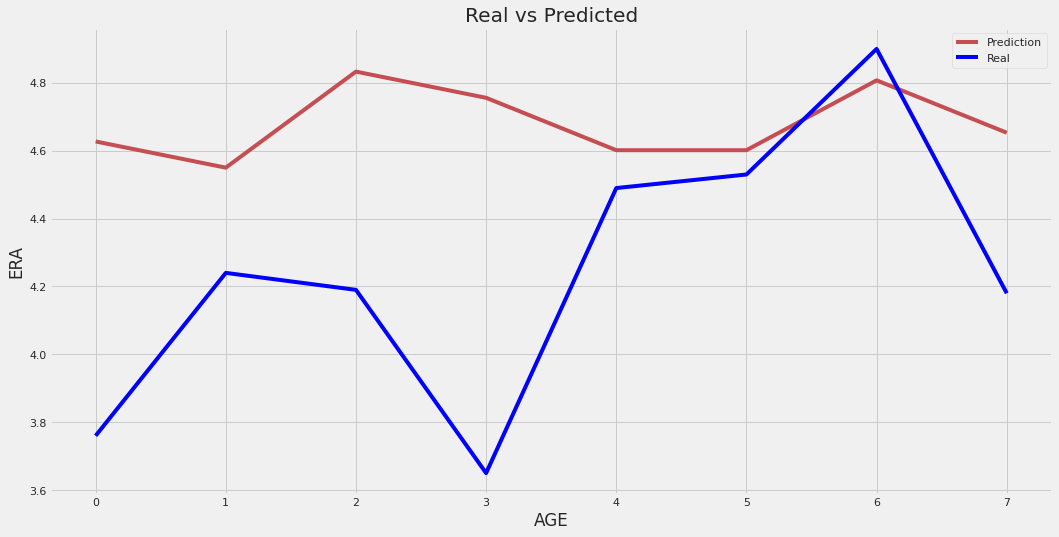

In [126]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(16,8))
plt.title("Real vs Predicted")
plt.plot(y_pred_age, color='r')
plt.plot(y_test_age, color='blue')
plt.ylabel("ERA")
plt.xlabel("AGE")
plt.legend(["Prediction", "Real"])

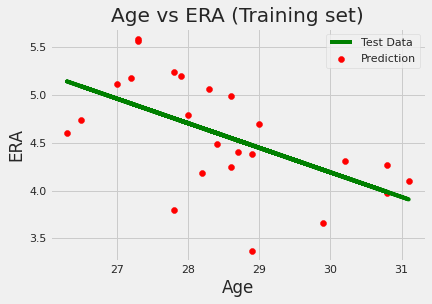

In [146]:
plt.scatter(X_train_age, y_train_age, color = "red")
plt.plot(X_train_age, age_reg.predict(X_train_age), color = "green")
plt.title("Age vs ERA (Training set)")
plt.xlabel("Age")
plt.ylabel("ERA")
plt.legend(['Test Data', 'Prediction'])
plt.show()

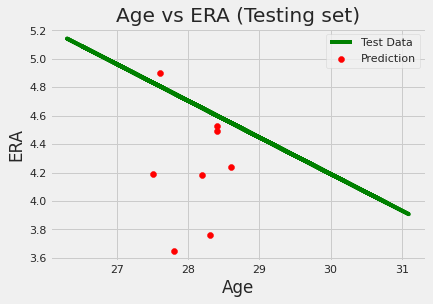

In [145]:
plt.scatter(X_test_age, y_test_age, color = "red")
plt.plot(X_train_age, age_reg.predict(X_train_age), color = "green")
plt.title("Age vs ERA (Testing set)")
plt.xlabel("Age")
plt.ylabel("ERA")
plt.legend(['Test Data', 'Prediction'])
plt.show()

# As you can see age has almost no influence on ERA

# Linear Regression Model to Predict ERA based on SO/W (Strikeouts per Walk)

In [133]:
X_so = pitching_df['SO/W']
y_so = pitching_df.ERA

In [134]:
X_so = np.asarray(X_so).reshape(-1,1)
y_so = np.asarray(y_so).reshape(-1,1)

In [135]:
X_train_so, X_test_so, y_train_so, y_test_so = train_test_split(X_so, y_so)

In [136]:
so_reg = LinearRegression().fit(X_train_so, y_train_so)

In [137]:
so_reg.score(X_test_so, y_test_so)

0.383438103531084

In [138]:
y_pred_so = so_reg.predict(X_test_so)

In [139]:
y_pred_so

array([[4.73747629],
       [4.70712212],
       [4.55535127],
       [3.38165665],
       [4.72735824],
       [4.90948326],
       [4.0292123 ],
       [3.91791367]])

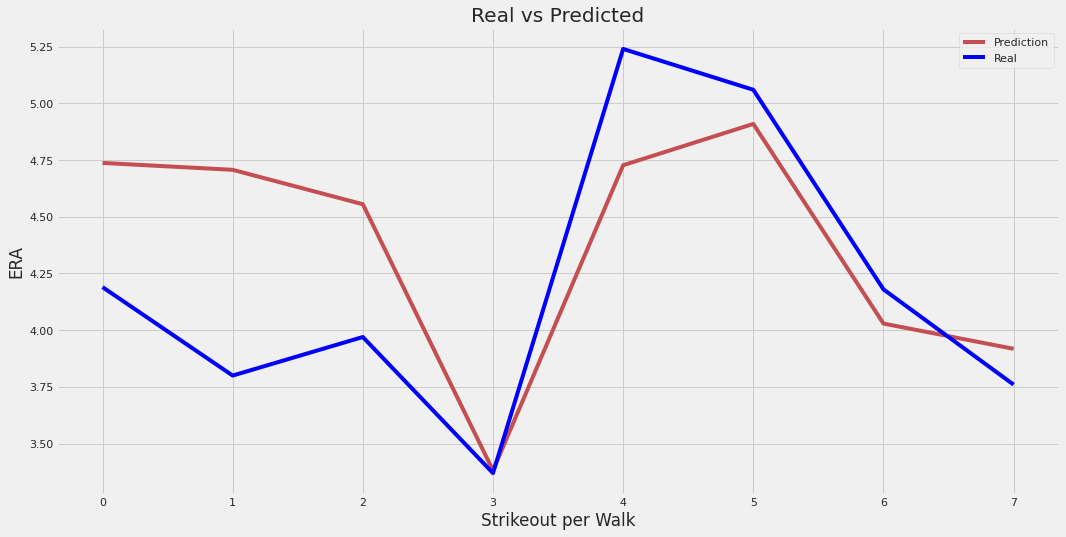

In [140]:
plt.style.use('fivethirtyeight')

plt.figure(figsize=(16,8))
plt.title("Real vs Predicted")
plt.plot(y_pred_so, color='r')
plt.plot(y_test_so, color='blue')
plt.ylabel("ERA")
plt.xlabel("Strikeout per Walk")
plt.legend(["Prediction", "Real"])

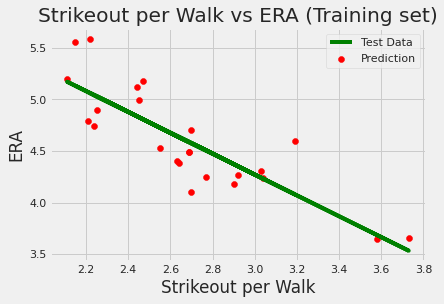

In [144]:
plt.scatter(X_train_so, y_train_so, color = "red")
plt.plot(X_train_so, so_reg.predict(X_train_so), color = "green")
plt.title("Strikeout per Walk vs ERA (Training set)")
plt.xlabel("Strikeout per Walk")
plt.ylabel("ERA")
plt.legend(['Test Data', 'Prediction'])
plt.show()

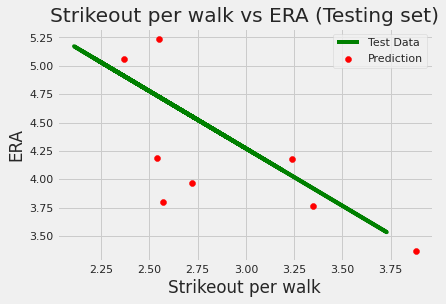

In [143]:
plt.scatter(X_test_so, y_test_so, color = "red")
plt.plot(X_train_so, so_reg.predict(X_train_so), color = "green")
plt.title("Strikeout per walk vs ERA (Testing set)")
plt.xlabel("Strikeout per walk")
plt.ylabel("ERA")
plt.legend(['Test Data', 'Prediction'])
plt.show()

# SO/W and WHIP are the best features to predict ERA with